In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
data = pd.read_csv('AirPassengers.csv', index_col=0, parse_dates=[0])

In [6]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


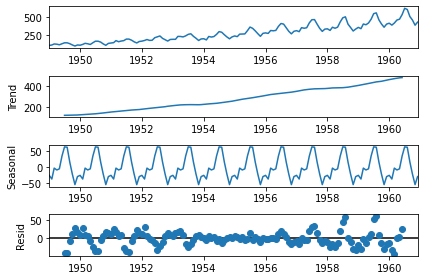

In [7]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(data)
fig = res.plot()

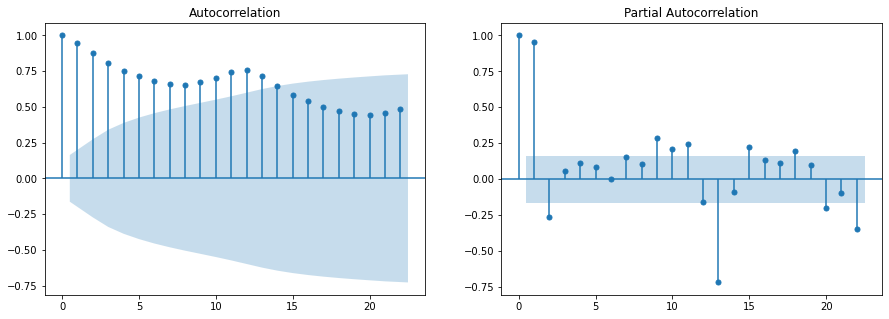

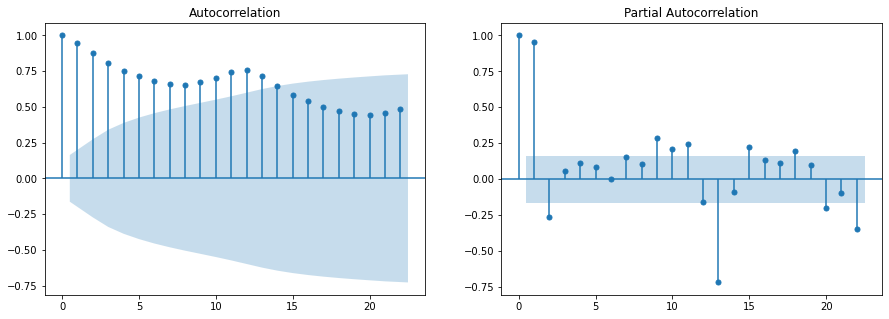

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sm.tsa.graphics.plot_acf(data, ax=axes[0])
sm.tsa.graphics.plot_pacf(data, ax=axes[1])

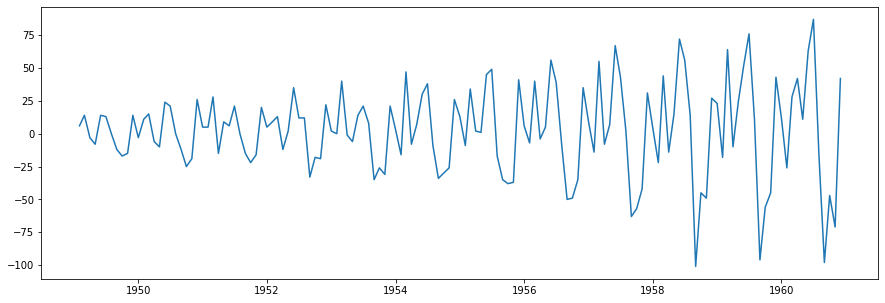

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(data.diff(1))

In [12]:
sm.tsa.adfuller(data)[1]

ldata = np.log(data)
sm.tsa.adfuller(ldata)[1]

sm.tsa.adfuller(ldata.diff().dropna())[1]

0.07112054815085957

/Users/kojimayuto/anaconda3/envs/mathmatics/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/kojimayuto/anaconda3/envs/mathmatics/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


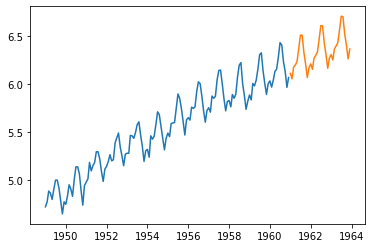

In [13]:
model = sm.tsa.SARIMAX(ldata, order=(1, 1, 1), seasonal_order=(0, 1, 2, 12))
res_model = model.fit()
pred = res_model.forecast(36)
plt.plot(ldata, label="Original")
plt.plot(pred, label="Pred")

In [14]:
df = pd.DataFrame(np.arange(6).reshape(6, 1), columns=["values"])

df["diff_1"] = df["values"].diff(1)
df["diff_2"] = df["values"].diff(2)
df["shift"] = df["values"].shift(1)
df["ch"] = df["values"].pct_change(1)
df["rolling_mean"] = df["values"].rolling(2).mean()
df["rolling_max"] = df["values"].rolling(2).max()

In [15]:
df

,values,diff_1,diff_2,shift,ch,rolling_mean,rolling_max
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,NaN,0.0,inf,0.5,1.0
2,2,1.0,2.0,1.0,1.000000,1.5,2.0
3,3,1.0,2.0,2.0,0.500000,2.5,3.0
4,4,1.0,2.0,3.0,0.333333,3.5,4.0
5,5,1.0,2.0,4.0,0.250000,4.5,5.0
